## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_results = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
mouse_study_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Look at mouse_metadata
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
# Look at study_results
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
mouse_study_results.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [5]:
# Checking the number of mice.
total_number_of_mice = mouse_metadata['Mouse ID'].shape[0]
print(f"There is a total of {total_number_of_mice} mice in this study.")

There is a total of 249 mice in this study.


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
DMice = mouse_study_results.loc[mouse_study_results.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
DMice

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID.

print('Looking at the out put of the code from above, we see that mouse "g989" is the only duplicate mouse.')


Looking at the out put of the code from above, we see that mouse "g989" is the only duplicate mouse.


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_study_results[mouse_study_results["Mouse ID"].isin(DMice) == False]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
total_number_of_mice_in_clean_data = len(clean_data['Mouse ID'].unique())
print(f"There is a total of {total_number_of_mice_in_clean_data} mice in this clean dataframe.")

There is a total of 248 mice in this clean dataframe.


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_stats = clean_data.groupby('Drug Regimen')
summary_stats.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [11]:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

tmean = summary_stats['Tumor Volume (mm3)'].mean()
tmean.head()

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Name: Tumor Volume (mm3), dtype: float64

In [12]:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tmedian = summary_stats['Tumor Volume (mm3)'].median()
tmedian.head()

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tvariance = summary_stats['Tumor Volume (mm3)'].var()
tvariance.head()

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tstd = summary_stats['Tumor Volume (mm3)'].std()
tstd.head()

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Name: Tumor Volume (mm3), dtype: float64

In [15]:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tSEM = summary_stats['Tumor Volume (mm3)'].sem()
tSEM.head()

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# Assemble the resulting series into a single summary dataframe.
summary_stat_series = pd.DataFrame({'Mean': tmean, 'Median': tmedian, 'Variance': tvariance, 'Standard Deviation': tstd, 'SEM': tSEM})
summary_stat_series.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [17]:
# Using the aggregation method, produce the same summary statistics in a single line
from scipy.stats import sem
Drug_Summary = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([np.mean,np.median,np.var,np.std,sem])
Drug_Summary
# clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe() 3rd activity in the wrestlers. plotting.

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

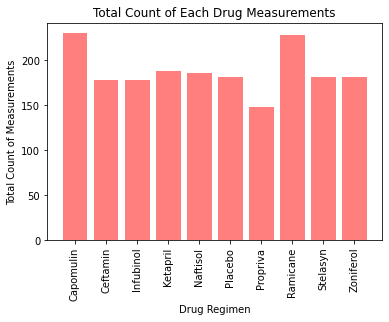

In [18]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
Drug_Regimen = Drug_Summary.index
Total_Count = summary_stats['Drug Regimen'].value_counts()
plt.bar(Drug_Regimen, Total_Count, color='r', alpha=0.5, align="center")


# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Total Count of Measurements")
plt.title("Total Count of Each Drug Measurements")
plt.xticks(rotation=90)

<BarContainer object of 10 artists>

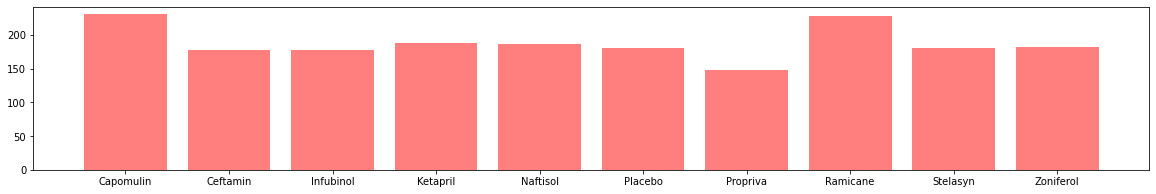

In [19]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# Set x axis and tick locations
x_axis = Drug_Regimen
y_axis = Total_Count

plt.figure(figsize=(20,3))
plt.bar(x_axis,y_axis, color='r', alpha=0.5, align="center")

Male      958
Female    922
Name: Sex, dtype: int64


([<matplotlib.patches.Wedge at 0x7fedcdf9cd00>,
 [Text(-0.7433500820741924, -0.942035379102235, 'Male'),
  Text(0.6814042419013431, 0.8635324308437154, 'Female')],
 [Text(-0.4336208812099456, -0.549520637809637, '51.0%'),
  Text(0.3716750410370962, 0.47101768955111745, '49.0%')])

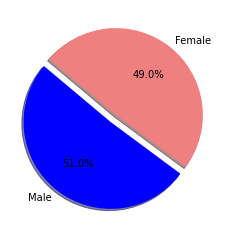

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Labels for the sections of our pie chart
labels = ['Male', 'Female']
gender = clean_data['Sex'].value_counts()
print(gender)
# The colors of each section of the pie chart
colors = ["blue", "lightcoral"]

# Tells matplotlib to seperate the "Male" section from the others
explode = (0.1, 0)

plt.pie(gender, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

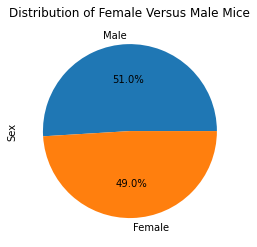

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = clean_data['Sex'].value_counts()

gender_mice = gender.plot(kind="pie", title=("Distribution of Female Versus Male Mice"), autopct="%1.1f%%")

plt.show()

## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Part 1

max_tp = clean_data.groupby('Mouse ID')['Timepoint'].max()
max_tp


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Part 2

max_tp_sorting = max_tp.sort_values()
max_tp_sorting

Mouse ID
b447     0
x226     0
f932     0
x336     0
l872     0
        ..
k894    45
l471    45
l509    45
i177    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Part 3
# Create a DataFrame 
max_tvp = pd.DataFrame(max_tp_sorting)
max_tvp


,Timepoint
Mouse ID,
b447,0
x226,0
f932,0
x336,0
l872,0
...,...
k894,45
l471,45
l509,45


In [41]:
# Rename Timepoint column to Greatest (Max) Timepoint
greatest_max_tp = max_tvp.rename(columns={'Timepoint': 'max_timepoint'})
greatest_max_tp

,max_timepoint
Mouse ID,
b447,0
x226,0
f932,0
x336,0
l872,0
...,...
k894,45
l471,45
l509,45


In [43]:
# Put treatments into a list for for loop (and later for plot labels)
drug_name = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_name:     
    sample = clean_data.loc[clean_data['Drug Regimen'] == drug]
    # add subset 
    final_tumor_vol = sample.loc[sample['Timepoint'] == sample['max_timepoint']]
    
    tumor_values = tumor_vol_data['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_values)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

# Determine upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {drug}: {lower_bound} could be outliers.")
    print(f"Values above {drug}: {upper_bound} could be outliers.")
    
# Determine outliers using upper and lower bounds
    outliers = (tumor_values.loc[(final_tumor_vol['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_tumor_vol['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers}')

KeyError: 'max_timepoint'

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
